In [4]:
import collections
import os
import pickle
path = 'Drebin-Dataset/generated'
feature_file = 'features-u-pr-sr-ac-i-per_count.p'
with open(os.path.join(path, feature_file), 'rb') as file:
    f = pickle.load(file)
    print(len(f))

    # api_call = [obj for obj in f if 'provider' in obj[0:8]]
    # f= [sl.split('::') for sl in f ]

1196


In [44]:
l = ['test1::call','test2::call',{'test3':5}]
t = list(filter(lambda x: isinstance(x, dict) and 'test3' in x.keys(), l))
i = l.index(t[0])
print(l[i])
l[i].update({'test3':t[0].get('test3') +1})

{'test3': 5}


In [88]:
import pandas
import matplotlib.pyplot as plt
%matplotlib
df = pandas.read_csv('Drebin-Dataset/sha256_family.csv', index_col='sha256')
print(df.head())
df.info()
df.family.describe(include='all')
print('nb')
top20 = df.family.value_counts().head(20)
print(list(top20.keys()))
print(len(df.family.value_counts()))
ltop20 = list(top20.keys())
print(ltop20.index(df.family[0]))

df = df.assign(nbr_class=lambda x: x.family.apply(lambda y: ltop20.index(y) +1 if y in ltop20 else len(ltop20)+1 ))

# df.family.apply(lambda x: ltop20.index(x) +1 if x in ltop20 else len(ltop20) +1)
df.assign(nbr_class_b=1)
print('090b5be26bcc4df6186124c2b47831eb96761fcf61282d63e13fa235a20c7539' in df.index)
print(df.loc['090b5be26bcc4df6186124c2b47831eb96761fcf61282d63e13fa235a20c7539'].nbr_class)

top10 =  df.family.value_counts().head(10)
# counter = Counter(observations[:,-1])
lper = []
for k,v in top10.items():
    per = v / df.size * 100
    lper.append(per )
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
fig, ax1 = plt.subplots(figsize=(9, 6))
rects = ax1.barh(top10.keys(), top10.values, height=0.5)
ax1.set_xlabel("Nombre d'applications")
print(rects[1].get_width(), ax1.get_xlim()[1])
for i in range(len(top10.values)):
    if rects[i].get_width()+5 + 18*5> ax1.get_xlim()[1] :
        ax1.annotate(f"{lper[i]:.2f} %", xy=(rects[i].get_width() -16*5, i)
                     ,horizontalalignment='left', verticalalignment='center',color='white')
    else:
        ax1.annotate(f"{lper[i]:.2f} %", xy=(rects[i].get_width() +5, i)
                     ,horizontalalignment='left', verticalalignment='center',)
fig.canvas.set_window_title('Test')
fig.subplots_adjust(left=0.115, right=0.88)
plt.show()

Using matplotlib backend: Qt5Agg
                                                         family
sha256                                                         
090b5be26bcc4df6186124c2b47831eb96761fcf61282d6...     Plankton
bedf51a5732d94c173bcd8ed918333954f5a78307c2a2f0...  DroidKungFu
149bde78b32be3c4c25379dd6c3310ce08eaf58804067a9...     Plankton
dd11c105ec8bb3c851f5955fa53eebb91b7dc46bef4d919...    GinMaster
6832234c4eae7a57be4f68271b7eecb056c4cd8352c67d2...      FakeDoc
<class 'pandas.core.frame.DataFrame'>
Index: 5560 entries, 090b5be26bcc4df6186124c2b47831eb96761fcf61282d63e13fa235a20c7539 to 08811dd354c2c76c1bd3ad8e0c9fbecb60663442ce7b129b22f4a71f54be1b2b
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   family  5560 non-null   object
dtypes: object(1)
memory usage: 86.9+ KB
nb
['FakeInstaller', 'DroidKungFu', 'Plankton', 'Opfake', 'GinMaster', 'BaseBridge', 'Iconosys', 'Kmin', 'FakeDoc', 'Geinimi', 'Adrd', 'DroidDream

In [3]:
import numpy as np
with open('Drebin-Dataset/observations-5000/01.p', 'rb') as obs:
    observations = np.array(pickle.load(obs))
    print(observations[0])

[ 2  3 26 ...  0  0  5]


[ 2  3 26 ...  0  0  5]
Class=5, n=339 (0.263%)
Class=0, n=123453 (95.690%)
Class=4, n=613 (0.475%)
Class=10, n=1630 (1.263%)
Class=1, n=925 (0.717%)
Class=3, n=625 (0.484%)
Class=2, n=667 (0.517%)
Class=8, n=147 (0.114%)
Class=9, n=132 (0.102%)
Class=6, n=330 (0.256%)
Class=7, n=152 (0.118%)


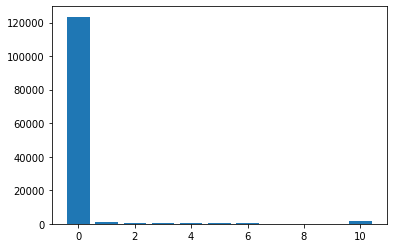

In [1]:
from collections import Counter
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
with open('Drebin-Dataset/observations-2/129012.p', 'rb') as obs:
    observations = np.array(pickle.load(obs))
    print(observations[0])
    counter = Counter(observations[:,-1])
    for k,v in counter.items():
        per = v / len(observations) * 100
        print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    # plot the distribution
    plt.bar(counter.keys(), counter.values())
    plt.show()

In [ ]:
    print(observations.max(axis=0))

In [1]:
import tensorflow as tf
import numpy as np
import pickle
with open('Drebin-Dataset/observations-5000/01.p', 'rb') as obs:
    observations = pickle.load(obs)

In [2]:
dataset = tf.data.Dataset.from_tensor_slices(observations)

In [6]:
print(dataset)

<TensorSliceDataset shapes: (11386,), types: tf.int32>


In [8]:
l = observations.max(axis=0)

In [9]:
with open('Drebin-Dataset/observations-5000/02.p', 'rb') as obs:
    observations2 = pickle.load(obs)
l2 =  observations2.max(axis=0)

AttributeError: 'list' object has no attribute 'max'

In [12]:
print(np.array(l,l2).max(axis=0))

NameError: name 'l2' is not defined

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [4]:
import importlib

import ml.helpers as helper
importlib.reload(helper)
data = helper.NNData('Drebin-Dataset/observations-5count', train_split=0.7, tv_split=0.5, nbr_classes=2)

data.data_preprocessing(calcul=False,inbalanced=False)

x_te, y_te = data.get_test_data()

In [5]:
import tensorflow as tf
model = tf.keras.models.load_model(filepath='results/nn/1616596805')
model.summary()
loss_and_metrics = model.evaluate(x_te, y_te)
tpr, fpr = helper.measure_performance(model.predict(x_te).argmax(axis=1), y_te.argmax(axis=1))
model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1282048   
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 1,348,354
Trainable params: 1,348,354
Non-trainable params: 0
______________________________________________

In [89]:
model = tf.keras.models.load_model(filepath='results/nn/1616411136')
model.summary()
model.
loss_and_metrics = model.evaluate(x_te, y_te)
tpr, fpr = helper.measure_performance(model.predict(x_te).argmax(axis=1), y_te)

NameError: name 'tf' is not defined

In [4]:
from collections import Counter

c = Counter(y_te)
strat = dict((key,int(len(y_te)/len(c))) for key in c.keys())

In [5]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=strat)
x,y = oversample.fit_resample(x_te,y_te)


ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 14370 samples and 1363 samples are asked.

In [1]:
import importlib

import ml.helpers as helper
importlib.reload(helper)
data = helper.NNData('Drebin-Dataset/observation-test', train_split=0.7, tv_split=0.5, nbr_classes=2)

data.data_preprocessing(calcul=False, inbalanced=True)


TypeError: 'NoneType' object is not callable

In [52]:
dvg = data.validation_generator(batch_size=1000)

In [58]:
batch1 = next(dvg)

In [1]:
import importlib

import ml.helpers as helper
importlib.reload(helper)
data = helper.NNData('Drebin-Dataset/observations-6count', train_split=0.7, tv_split=0.5, nbr_classes=2)

data.data_preprocessing(calcul=True, inbalanced=False)


Normalisation step  Drebin-Dataset/observations-6count/129012.p


In [2]:
data.counter_class

{5: 339,
 0: 123453,
 4: 613,
 10: 1630,
 1: 925,
 3: 625,
 2: 667,
 8: 147,
 9: 132,
 6: 330,
 7: 152}

In [3]:
import os
# os.chdir(os.path.join(os.path.abspath(os.path.curdir),u'ml'))
import importlib
import pickle
import ml.deep_network as dp
import matplotlib as mlp
importlib.reload(dp)
%matplotlib auto
with open("../results/nn/1616867076/history",'rb') as f:
    history = pickle.load(f)
class hist:
    history = None
    epoch = None
    def __init__(self, history):
        self.history = history
        self.epoch = range(len(history.get('loss')))
print(history)

h = hist(history)
dp.plot_metrics(h)

Using matplotlib backend: Qt5Agg
{'loss': [2.141848087310791, 0.2089601457118988, 0.16007331013679504, 0.1330902874469757, 0.1187535896897316, 0.11024732142686844, 0.09694933146238327, 0.09118955582380295, 0.08115052431821823, 0.07228251546621323, 0.06372469663619995, 0.057003382593393326, 0.05426083505153656, 0.05137687176465988, 0.048043835908174515, 0.042734209448099136, 0.03930895775556564, 0.038075853139162064, 0.03611314296722412, 0.0332072414457798, 0.030614223331212997, 0.029564721509814262, 0.02757881209254265, 0.024725334718823433, 0.02469351515173912, 0.022233009338378906, 0.024524934589862823, 0.021473689004778862, 0.021231284365057945, 0.01981026865541935, 0.02044672518968582, 0.020196717232465744, 0.019226573407649994, 0.017035512253642082, 0.017878038808703423, 0.017540929839015007, 0.013514774851500988, 0.018681522458791733, 0.01793980598449707, 0.01517791859805584, 0.01580265909433365, 0.01417374424636364, 0.01499258354306221, 0.015989499166607857, 0.011858047917485237